## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [1]:
import pandas as pd
import sklearn
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

df = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [2]:
#logistic model

X = df[['age', 'chol']]
y = df['diagnosis']

#create test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

#log model

log_pipeline = Pipeline(
    [("preprocessing", ct),
     ("log_classifier", LogisticRegression())]
)

#fit the model
log_fitted = log_pipeline.fit(X_train,y_train)

#predict outcomes
pred = log_fitted.predict_proba(X_test)


In [3]:
#min and max cholesterol
min = df['chol'].min()
max = df['chol'].max()

print("Min:", min)
print("Max:", max)

Min: 126
Max: 564


In [4]:
# Creating a range of cholesterol values from 126 to 564
cholesterol_values = np.linspace(126, 564, 100)

# Creating a DataFrame with 100 observations where all are 55 year olds
df_55 = pd.DataFrame({
    "age": np.repeat(55, 100),
    "chol": cholesterol_values
})

df_55.head()

,age,chol
0,55,126.000000
1,55,130.424242
2,55,134.848485
3,55,139.272727
4,55,143.696970


In [5]:
# Predicting probabilities for the 55-year-old individuals
predicted_probabilities = log_fitted.predict_proba(df_55)

# Adding these probabilities to the df_55 for analysis
df_55['probs'] = predicted_probabilities[:, 1]  # Probability of '1' (Disease)

df_55.head()

,age,chol,probs
0,55,126.000000,0.374305
1,55,130.424242,0.377595
2,55,134.848485,0.380895
3,55,139.272727,0.384207
4,55,143.696970,0.387529


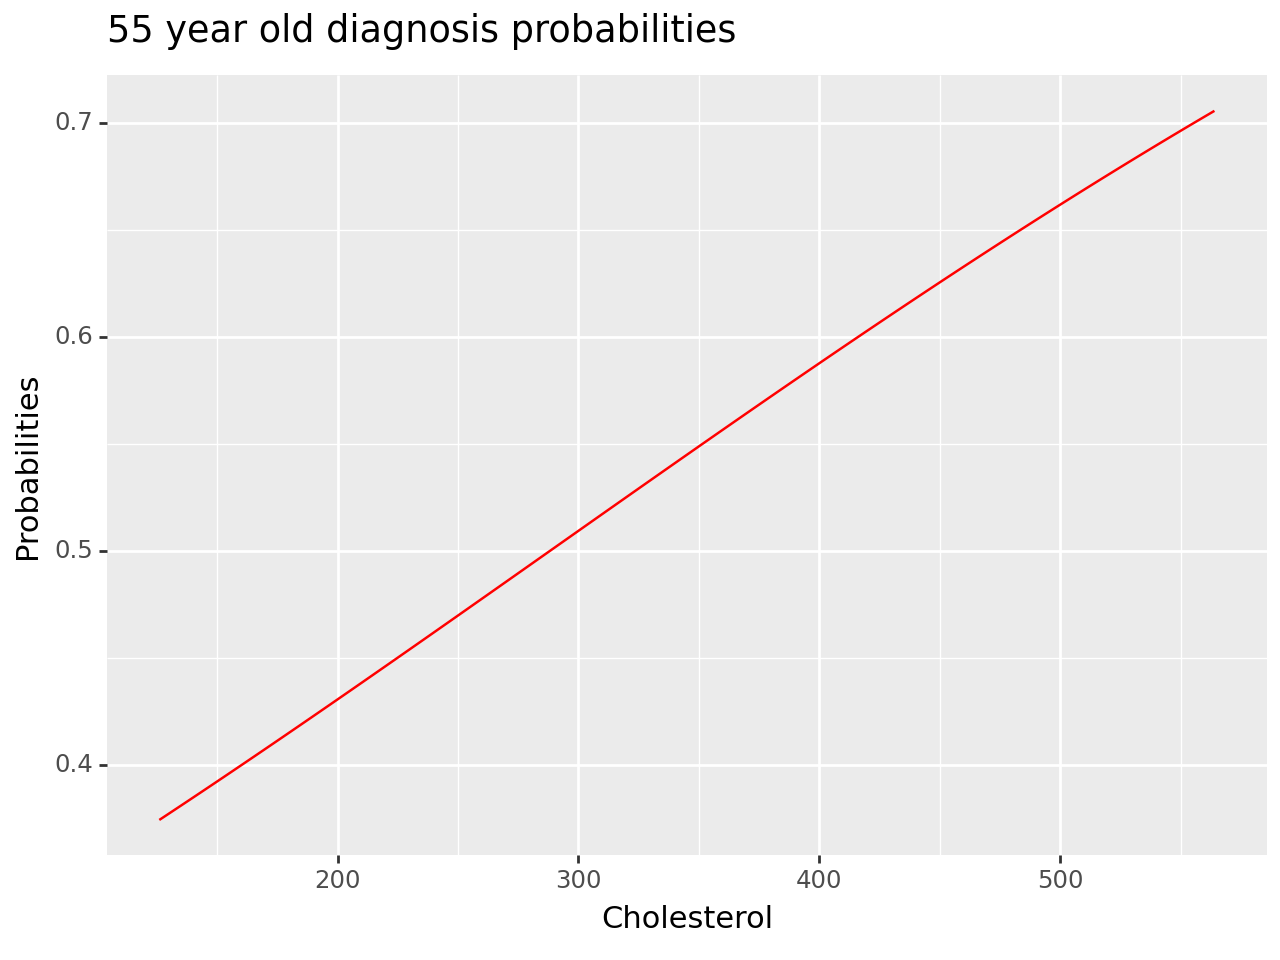

In [6]:
import plotnine
from plotnine import *

plot = (ggplot(df_55, aes(x='chol', y='probs')) +
        geom_line(color='red') +
        labs(title='55 year old diagnosis probabilities', x='Cholesterol', y='Probabilities')
        )
print(plot)

In [7]:
# find the Cholesterol value where probability is 50%
# Ensure the DataFrame is sorted by cholesterol level
df_55_sorted = df_55.sort_values(by='chol')

# Find the first instance where the probability exceeds 0.5
cholesterol_at_threshold = df_55_sorted[df_55_sorted['probs'] >= 0.5].iloc[0]['chol']

cholesterol_at_threshold

289.6969696969697

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_pipeline = Pipeline(
    [('preprocessing', ct),
     ('lda_analysis', LinearDiscriminantAnalysis())
     ]
)

#fit the model

lda_fitted = lda_pipeline.fit(X_train,y_train)

#predict
pred_2 = lda_fitted.predict_proba(X_test)


In [9]:
# Creating a range of cholesterol values from 126 to 564
cholesterol_values = np.linspace(126, 564, 100)

# Creating a DataFrame with 100 observations where all are 55 year olds
df_lda = pd.DataFrame({
    "age": np.repeat(55, 100),
    "chol": cholesterol_values
})

df_lda.head()

,age,chol
0,55,126.000000
1,55,130.424242
2,55,134.848485
3,55,139.272727
4,55,143.696970


In [10]:
# Predicting probabilities for the 55-year-old individuals
predicted_probabilities = lda_fitted.predict_proba(df_lda)

# Adding these probabilities to the df_55 for analysis
df_lda['probs'] = predicted_probabilities[:, 1]  # Probability of '1' (Disease)

df_lda.head()

,age,chol,probs
0,55,126.000000,0.376788
1,55,130.424242,0.380001
2,55,134.848485,0.383225
3,55,139.272727,0.386459
4,55,143.696970,0.389703


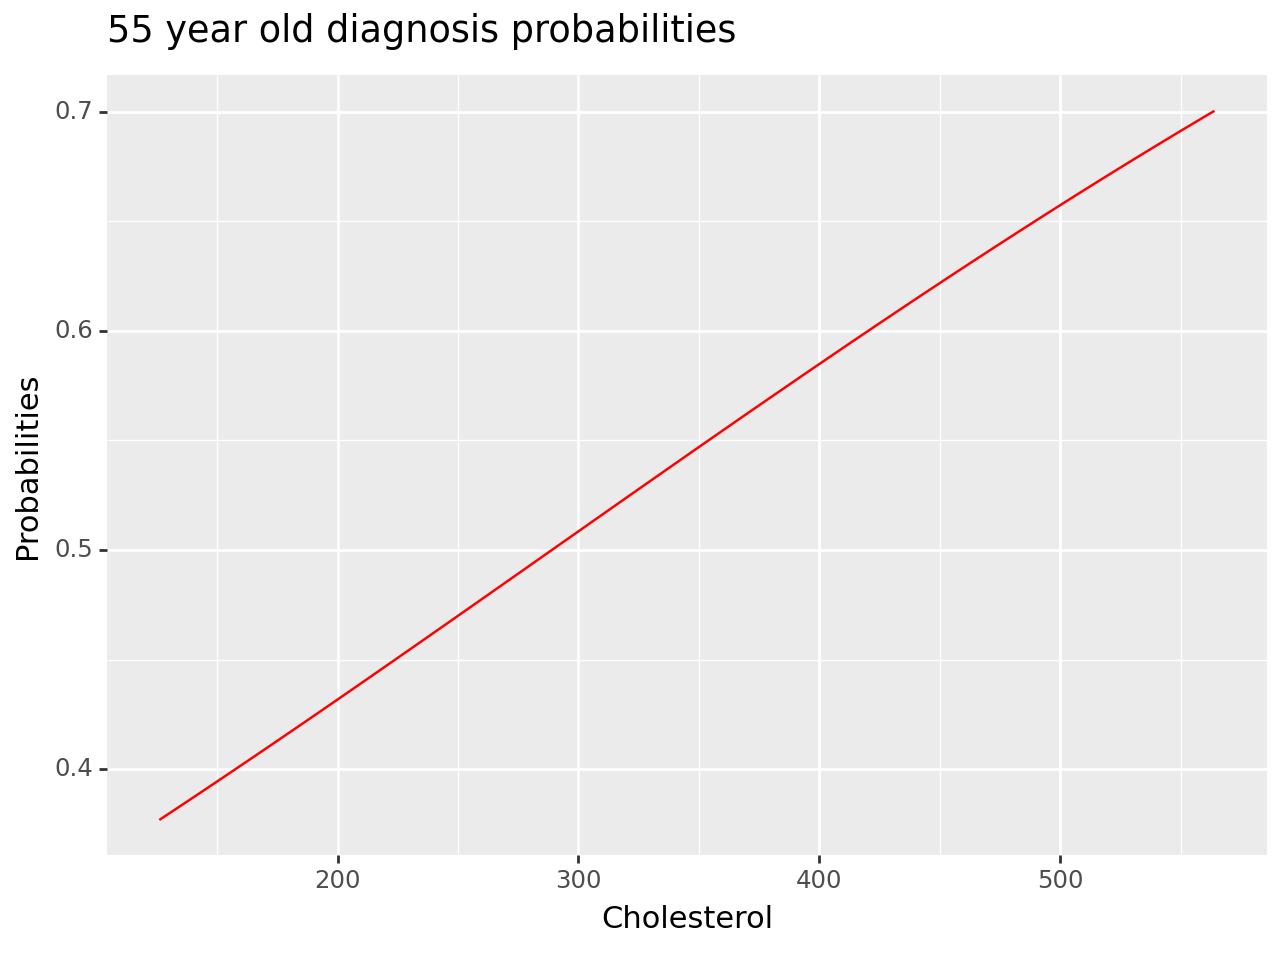

In [11]:
import plotnine
from plotnine import *

plot = (ggplot(df_lda, aes(x='chol', y='probs')) +
        geom_line(color='red') +
        labs(title='55 year old diagnosis probabilities', x='Cholesterol', y='Probabilities')
        )
print(plot)

In [12]:
# find the Cholesterol value where probability is 50%
# Ensure the DataFrame is sorted by cholesterol level
df_lda_sorted = df_lda.sort_values(by='chol')

# Find the first instance where the probability exceeds 0.5
cholesterol_at_threshold = df_lda_sorted[df_lda_sorted['probs'] >= 0.5].iloc[0]['chol']

cholesterol_at_threshold

289.6969696969697

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [13]:
from sklearn.svm import SVC

svc_pipeline = Pipeline(
    [('preprocessing', ct),
     ('svc_analysis', SVC(gamma='auto', probability=True))
     ]
)

#fit the model

svc_fitted = svc_pipeline.fit(X_train,y_train)

#predict
pred_3 = svc_fitted.predict_proba(X_test)


In [14]:
# Creating a range of cholesterol values from 126 to 564
cholesterol_values = np.linspace(126, 564, 100)

# Creating a DataFrame with 100 observations where all are 55 year olds
df_svc = pd.DataFrame({
    "age": np.repeat(55, 100),
    "chol": cholesterol_values
})

df_svc.head()

,age,chol
0,55,126.000000
1,55,130.424242
2,55,134.848485
3,55,139.272727
4,55,143.696970


In [15]:
# Predicting probabilities for the 55-year-old individuals
predicted_probabilities = svc_fitted.predict_proba(df_svc)

# Adding these probabilities to the df_55 for analysis
df_svc['probs'] = predicted_probabilities[:, 1]  # Probability of '1' (Disease)

df_svc.head()

,age,chol,probs
0,55,126.000000,0.352380
1,55,130.424242,0.351384
2,55,134.848485,0.350346
3,55,139.272727,0.349250
4,55,143.696970,0.348093


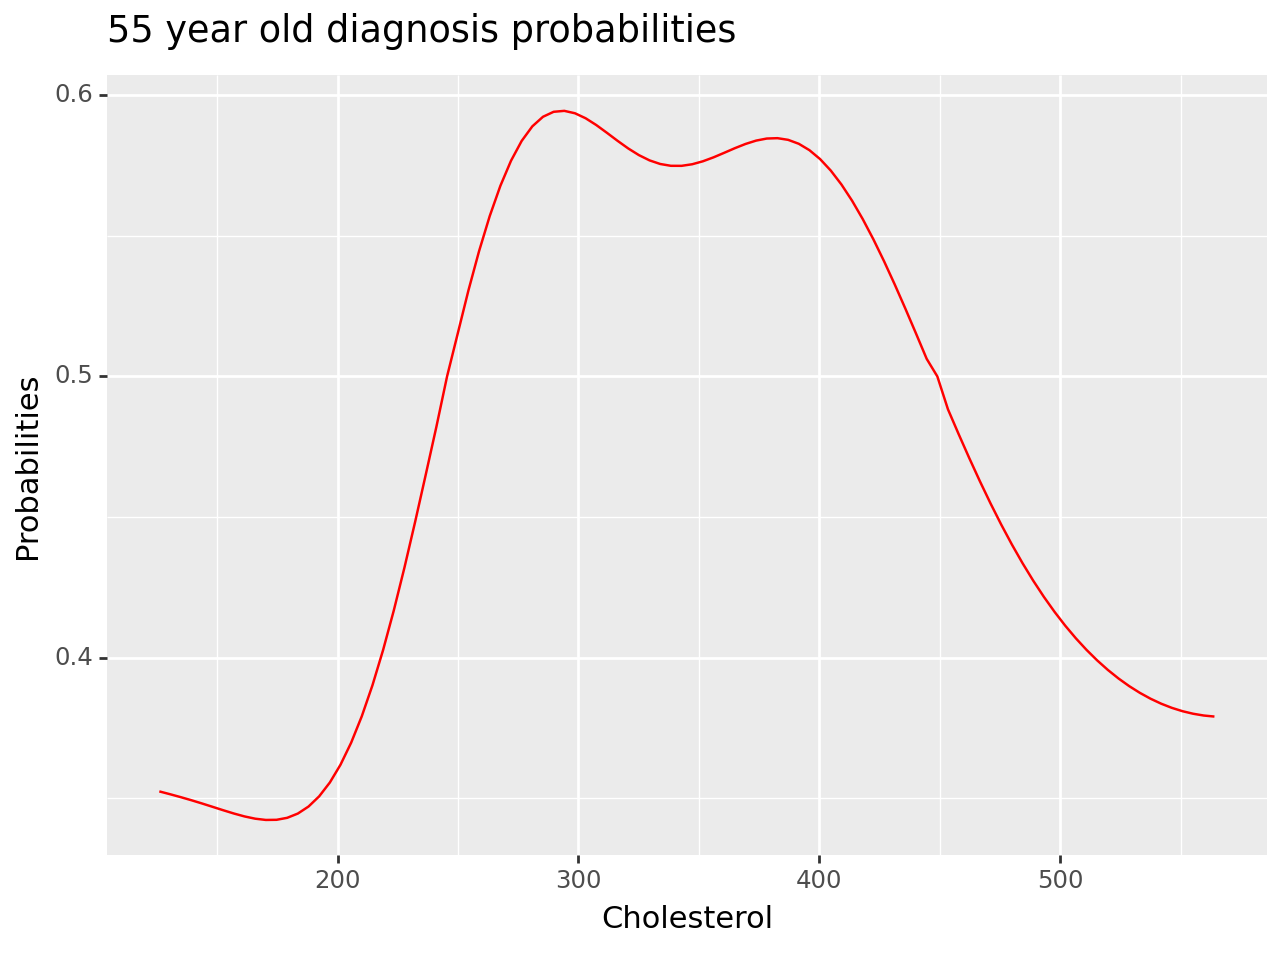

In [16]:
import plotnine
from plotnine import *

cholesterol_threshold = df_svc[df_svc['probs'] >= 0.5].iloc[0]['chol']


plot = (ggplot(df_svc, aes(x='chol', y='probs')) +
        geom_line(color='red') +
        labs(title='55 year old diagnosis probabilities', x='Cholesterol', y='Probabilities')
        )
print(plot)

In [17]:
# find the Cholesterol value where probability is 50%
# Ensure the DataFrame is sorted by cholesterol level
df_svc_sorted = df_svc.sort_values(by='chol')

# Find the first instance where the probability exceeds 0.5
cholesterol_at_threshold = df_svc_sorted[df_svc_sorted['probs'] >= 0.5].iloc[0]['chol']

cholesterol_at_threshold

245.45454545454544

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

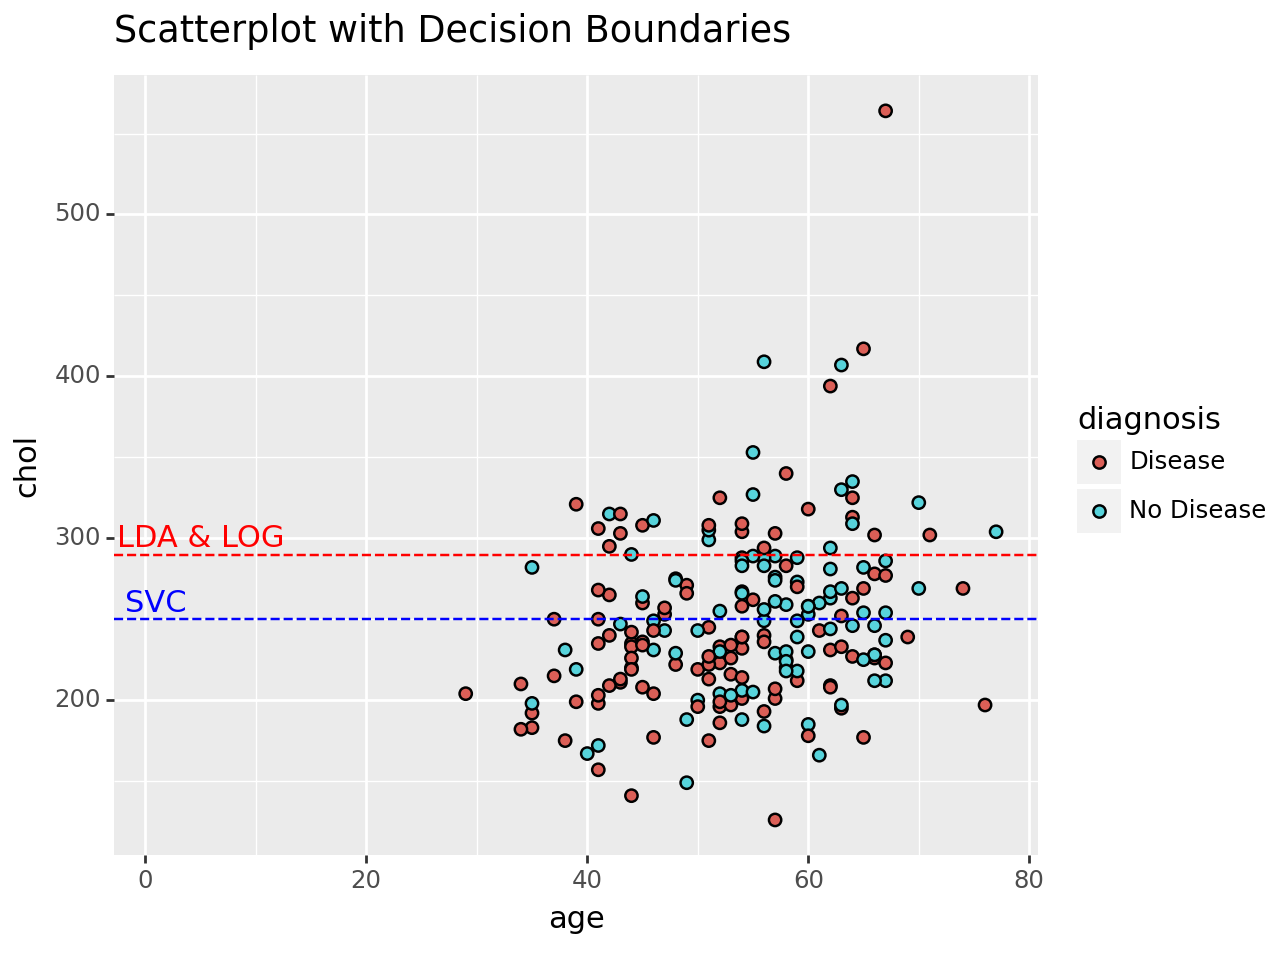

<Figure Size: (640 x 480)>

In [18]:
import plotnine as p9
from plotnine import *

# Creating the scatter plot
plot = (ggplot(df, aes(x="age", y="chol", fill="diagnosis")) +
        geom_point(size=2) +
        geom_hline(yintercept=249.87, color="blue", linetype="dashed") +
        geom_hline(yintercept=289.696, color="red", linetype="dashed") +
        annotate("text", x=1, y=259.87, label="SVC", color="blue") +
        annotate("text", x=5, y=299.87, label="LDA & LOG", color="red") +
        labs(title="Scatterplot with Decision Boundaries")
)


plot